## Imports

In [236]:
import pandas as pd
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
# import pylab as pl

## Reading Data

In [237]:
df = pd.read_csv("ChurnData.csv")
print(df.shape)
df.head()

(200, 28)


,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


## Data Preprocessing

In [238]:
# print(df.columns)

df = df[["tenure", "age", "address", "income", "ed", "employ", "equip", "callcard", "wireless", "churn"]]
df["churn"] = df["churn"].astype(int)
df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


## Declaring X and Y

In [239]:
x = np.asanyarray(df[["tenure", "age", "address", "income", "ed", "employ", "equip", "callcard", "wireless"]])
print(x[0:5])

y = np.asanyarray(df[["churn"]])
print("\n", y[0:5])

[[ 11.  33.   7. 136.   5.   5.   0.   1.   1.]
 [ 33.  33.  12.  33.   2.   0.   0.   0.   0.]
 [ 23.  30.   9.  30.   1.   2.   0.   0.   0.]
 [ 38.  35.   5.  76.   2.  10.   1.   1.   1.]
 [  7.  35.  14.  80.   2.  15.   0.   1.   0.]]

 [[1]
 [1]
 [0]
 [0]
 [0]]


## Making Data Standard

In [240]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(x)
x = scaler.transform(x.astype(float))
x[0:5]

array([[-1.14, -0.63, -0.46,  0.48,  1.7 , -0.58, -0.86,  0.65,  1.56],
       [-0.12, -0.63,  0.03, -0.33, -0.64, -1.14, -0.86, -1.55, -0.64],
       [-0.58, -0.86, -0.26, -0.35, -1.42, -0.92, -0.86, -1.55, -0.64],
       [ 0.12, -0.47, -0.66,  0.01, -0.64, -0.03,  1.16,  0.65,  1.56],
       [-1.32, -0.47,  0.23,  0.04, -0.64,  0.53, -0.86,  0.65, -0.64]])

## Splitting Data (Train & Test)

In [241]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)
print(f"Train Data: x: {x_train.shape}, y: {y_train.shape}")
print(f"Test Data: x: {x_test.shape}, y: {y_test.shape}")

Train Data: x: (160, 9), y: (160, 1)
Test Data: x: (40, 9), y: (40, 1)


## Regression

In [242]:
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression(C=0.01, solver="liblinear")
reg.fit(x_train, y_train.ravel())

predicted_y = reg.predict(x_test)

print(f"Actual Data: \n", y_test.ravel())
print(f"\nPredicted Data: \n", predicted_y)


predicted_y_probability = reg.predict_proba(x_test)

print(f"\nPredicted Probabilities: \n", predicted_y)

Actual Data: 
 [0 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1
 1 0 0]

Predicted Data: 
 [0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 0 0 1 0 0 0 1
 0 0 1]

Predicted Probabilities: 
 [0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 0 0 1 0 0 0 1
 0 0 1]


## Evaluation

In [243]:
from sklearn.metrics import jaccard_score

jaccard_score(y_test, predicted_y, pos_label=0)

0.5625

### Confusion Matrix

In [244]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title="Confusion Matrix", cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    if normalize:
        cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")

    print(cm)

    plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = ".2f" if normalize else "d"
    threshold = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > threshold else "black")

    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.show()

### Computing Confusion Matrix

Confusion matrix, without normalization
[[ 8  7]
 [ 7 18]]


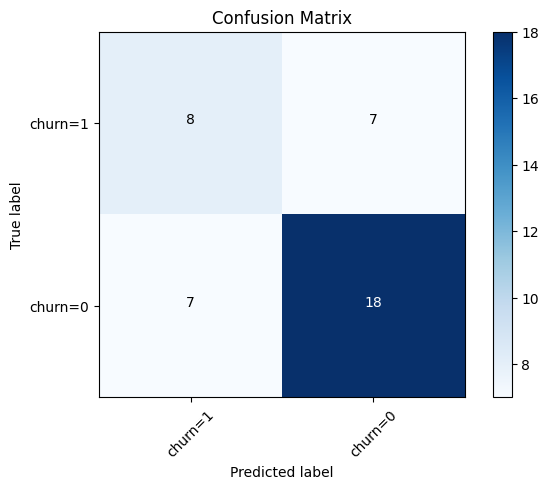

In [245]:
cnf_matrix = confusion_matrix(y_test, predicted_y, labels=[1,0])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'], normalize= False)

### Classification Report

In [246]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predicted_y))

              precision    recall  f1-score   support

           0       0.72      0.72      0.72        25
           1       0.53      0.53      0.53        15

    accuracy                           0.65        40
   macro avg       0.63      0.63      0.63        40
weighted avg       0.65      0.65      0.65        40



### Log Loss

In [247]:
from sklearn.metrics import log_loss

log_loss(y_test, predicted_y_probability)

0.6155809757244557